# Introduce Qiskit and demonstrate superpostion and entanglement

In [29]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [30]:
# Create a Quantum Register with 1 qubit.
q = QuantumRegister(1, 'q')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q)

## Superposition principle
In the following we apply Hadamard gate on qubit '0'. This operation takes the qubit 
\begin{equation*}
|0\rangle \rightarrow \frac{|0\rangle + |1\rangle} {\sqrt{2}}
\end{equation*}
This leads to the qubit being in state '0' and '1' with probability $0.5$.


In [31]:
circ.h(q[0])

In [32]:
circ.draw()

In [33]:
c = ClassicalRegister(1,'c')
meas = QuantumCircuit(q,c)
meas.barrier(q)
meas.measure(q,c)

qc = circ + meas
qc.draw()

In [34]:
# Import Aer
from qiskit import BasicAer

# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [35]:
counts = result_sim.get_counts(qc)
print(counts)

{'0': 499, '1': 525}


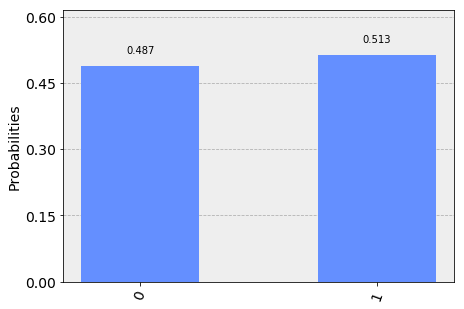

In [36]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Entanglement
Entanglement is an uniquely quantum phenomenon where qubits (anti-)correlated. In the following we will demonstrate simplest of entanglements, i.e. entanglement between two-qubits. These are referred to as Bell states.

In [37]:
# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2,'c')

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(q,c)

In [38]:
qc.h(q[0])
qc.cx(q[0], q[1])

In [39]:
qc.measure(q,c)
qc.draw()

In [40]:
# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [41]:
counts = result_sim.get_counts(qc)
print(counts)

{'00': 527, '11': 497}


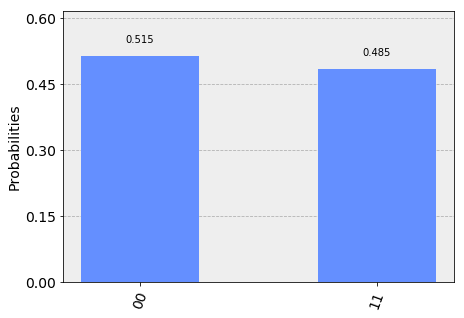

In [42]:
plot_histogram(counts)

## Simulating in IBM Cloud (HPC)

In [43]:
from qiskit import IBMQ

In [44]:
IBMQ.save_account('96a0a59b69f7b1d6b3a8faee637c7dc13eb70a73f9f53e39dda11361e8cd68a0133939ffff39ffba4dc7320de1386d62ffd86f4fa011c0a6d8fe9ed535bdca0a')

In [45]:
IBMQ.load_accounts()

In [46]:
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [47]:
backend = IBMQ.get_backend('ibmq_qasm_simulator', hub=None)

In [48]:
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_hpc = execute(qc, backend=backend, shots=shots, max_credits=max_credits)

In [49]:
result_hpc = job_hpc.result()

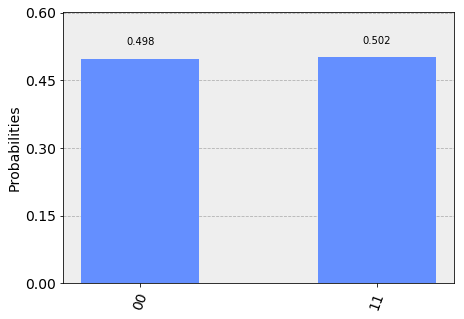

In [50]:
counts_hpc = result_hpc.get_counts(qc)
plot_histogram(counts_hpc)

## Running on real quantum machine

In [51]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits > 4 and
                                                       not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


In [52]:
from qiskit.tools.monitor import job_monitor
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [53]:
result_exp = job_exp.result()

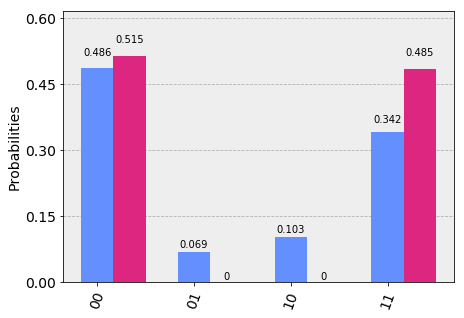

In [54]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])